#Análise de Microdados do ENEM

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mediaEnemPorMunicipio = pd.read_csv('mediaEnemPorMunicipio.csv', sep=',')

In [5]:
mediaEnemPorMunicipio.head()

,Unnamed: 0,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1,1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147
2,2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821
3,3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074
4,4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222


In [6]:
mediaEnemPorMunicipio = pd.read_csv('mediaEnemPorMunicipio.csv', sep=',', index_col=0)

In [7]:
mediaEnemPorMunicipio.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222


In [8]:
#importando dados IDHM

In [9]:
atlasHumano = pd.read_csv('dados_brutos.csv', sep=';')

In [10]:
atlasHumano

,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,"0,641","0,526","0,763","0,657"
1,2010,11,110002,1100023,ARIQUEMES,"0,702","0,600","0,806","0,716"
2,2010,11,110003,1100031,CABIXI,"0,650","0,559","0,757","0,650"
3,2010,11,110004,1100049,CACOAL,"0,718","0,620","0,821","0,727"
4,2010,11,110005,1100056,CEREJEIRAS,"0,692","0,602","0,799","0,688"
...,...,...,...,...,...,...,...,...,...
5560,2010,52,522200,5222005,VIANÓPOLIS,"0,712","0,622","0,818","0,710"
5561,2010,52,522205,5222054,VICENTINÓPOLIS,"0,684","0,562","0,804","0,707"
5562,2010,52,522220,5222203,VILA BOA,"0,647","0,534","0,818","0,619"
5563,2010,52,522230,5222302,VILA PROPÍCIO,"0,634","0,505","0,802","0,629"


In [11]:
colunasSelecionadas = ['ANO','UF', 'CODMUN6','CODMUN7','NOME_MUN','IDHM', 'IDHM_E','IDHM_L','IDHM_R']

In [12]:
atlasHumano = atlasHumano.filter(items= ['ANO','UF', 'Codmun6','Codmun7','Municipio','IDHM', 'IDHM_E','IDHM_L','IDHM_R'])

In [13]:

atlasHumano.head()

,ANO,UF,Codmun6,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2010,11,110001,1100015,"0,641","0,526","0,763","0,657"
1,2010,11,110002,1100023,"0,702","0,600","0,806","0,716"
2,2010,11,110003,1100031,"0,650","0,559","0,757","0,650"
3,2010,11,110004,1100049,"0,718","0,620","0,821","0,727"
4,2010,11,110005,1100056,"0,692","0,602","0,799","0,688"


In [14]:
pd.merge(mediaEnemPorMunicipio, atlasHumano, how = 'left',left_on = ['CO_MUNICIPIO_RESIDENCIA'], right_on = ['Codmun7'])

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,2010.0,11.0,110001.0,1100015.0,"0,641","0,526","0,763","0,657"
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,2010.0,11.0,110002.0,1100023.0,"0,702","0,600","0,806","0,716"
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,2010.0,11.0,110003.0,1100031.0,"0,650","0,559","0,757","0,650"
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,2010.0,11.0,110004.0,1100049.0,"0,718","0,620","0,821","0,727"
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,2010.0,11.0,110005.0,1100056.0,"0,692","0,602","0,799","0,688"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,467.945495,492.496537,512.282684,528.815315,563.896104,2010.0,52.0,522200.0,5222005.0,"0,712","0,622","0,818","0,710"
5566,5222054,Vicentinópolis,52,GO,443.824194,469.941270,489.447619,504.204839,503.492063,2010.0,52.0,522205.0,5222054.0,"0,684","0,562","0,804","0,707"
5567,5222203,Vila Boa,52,GO,433.489130,446.955102,469.622449,474.306522,465.714286,2010.0,52.0,522220.0,5222203.0,"0,647","0,534","0,818","0,619"
5568,5222302,Vila Propício,52,GO,450.603636,464.472414,480.539655,474.847273,460.689655,2010.0,52.0,522230.0,5222302.0,"0,634","0,505","0,802","0,629"


In [15]:
mediaEnemIDHM = pd.merge(mediaEnemPorMunicipio, atlasHumano, how = 'left',left_on = ['CO_MUNICIPIO_RESIDENCIA'], right_on = ['Codmun7'])

In [16]:
mediaEnemIDHM

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,2010.0,11.0,110001.0,1100015.0,"0,641","0,526","0,763","0,657"
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,2010.0,11.0,110002.0,1100023.0,"0,702","0,600","0,806","0,716"
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,2010.0,11.0,110003.0,1100031.0,"0,650","0,559","0,757","0,650"
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,2010.0,11.0,110004.0,1100049.0,"0,718","0,620","0,821","0,727"
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,2010.0,11.0,110005.0,1100056.0,"0,692","0,602","0,799","0,688"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,467.945495,492.496537,512.282684,528.815315,563.896104,2010.0,52.0,522200.0,5222005.0,"0,712","0,622","0,818","0,710"
5566,5222054,Vicentinópolis,52,GO,443.824194,469.941270,489.447619,504.204839,503.492063,2010.0,52.0,522205.0,5222054.0,"0,684","0,562","0,804","0,707"
5567,5222203,Vila Boa,52,GO,433.489130,446.955102,469.622449,474.306522,465.714286,2010.0,52.0,522220.0,5222203.0,"0,647","0,534","0,818","0,619"
5568,5222302,Vila Propício,52,GO,450.603636,464.472414,480.539655,474.847273,460.689655,2010.0,52.0,522230.0,5222302.0,"0,634","0,505","0,802","0,629"


In [17]:
mediaEnemIDHM.dtypes


CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
ANO                        float64
UF                         float64
Codmun6                    float64
Codmun7                    float64
IDHM                        object
IDHM_E                      object
IDHM_L                      object
IDHM_R                      object
dtype: object

In [18]:
#é necessário substituir a virgula por ponto nos floats

In [19]:
mediaEnemIDHM['IDHM'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_R'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_E'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_L'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))

In [20]:
mediaEnemIDHM.dtypes


CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
ANO                        float64
UF                         float64
Codmun6                    float64
Codmun7                    float64
IDHM                       float64
IDHM_E                     float64
IDHM_L                     float64
IDHM_R                     float64
dtype: object

In [21]:
municipios = pd.read_csv('municipios.csv')

In [25]:
municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [22]:
enem_idhm_municipios = pd.merge(mediaEnemIDHM, municipios, how = 'left', left_on = ['CO_MUNICIPIO_RESIDENCIA'], right_on = ['codigo_ibge'])

In [26]:
enem_idhm_municipios

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,...,IDHM_R,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,2010.0,...,0.641,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,2010.0,...,0.702,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,2010.0,...,0.650,1100031,Cabixi,-13.49450,-60.5520,0,11,37,69,America/Porto_Velho
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,2010.0,...,0.718,1100049,Cacoal,-11.43430,-61.4562,0,11,9,69,America/Porto_Velho
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,2010.0,...,0.692,1100056,Cerejeiras,-13.18700,-60.8168,0,11,27,69,America/Porto_Velho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,467.945495,492.496537,512.282684,528.815315,563.896104,2010.0,...,0.712,5222005,Vianópolis,-16.74050,-48.5159,0,52,9641,62,America/Sao_Paulo
5566,5222054,Vicentinópolis,52,GO,443.824194,469.941270,489.447619,504.204839,503.492063,2010.0,...,0.684,5222054,Vicentinópolis,-17.73220,-49.8047,0,52,9657,64,America/Sao_Paulo
5567,5222203,Vila Boa,52,GO,433.489130,446.955102,469.622449,474.306522,465.714286,2010.0,...,0.647,5222203,Vila Boa,-15.03870,-47.0520,0,52,67,61,America/Sao_Paulo
5568,5222302,Vila Propício,52,GO,450.603636,464.472414,480.539655,474.847273,460.689655,2010.0,...,0.634,5222302,Vila Propício,-15.45420,-48.8819,0,52,1068,62,America/Sao_Paulo


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

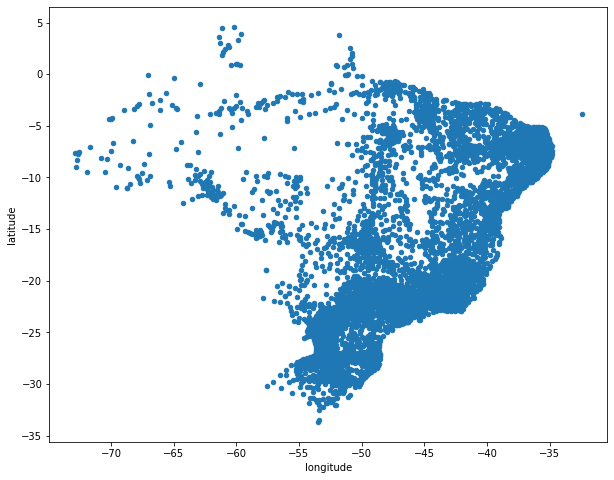

In [29]:
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', figsize =(10, 8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

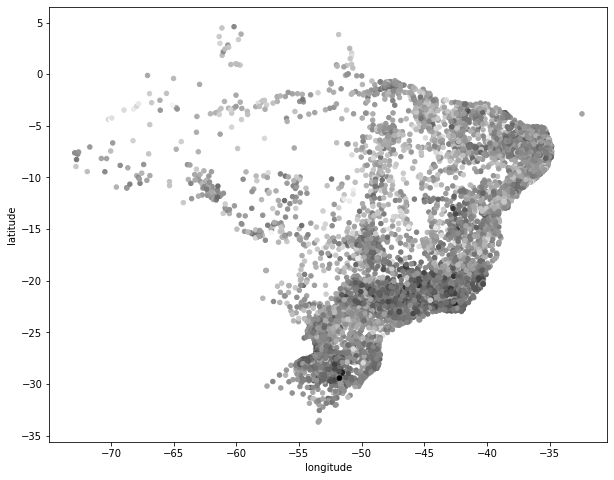

In [35]:
enem_idhm_municipios.plot\
.scatter(y='latitude', x='longitude',c = enem_idhm_municipios['NU_NOTA_REDACAO'], figsize =(10, 8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

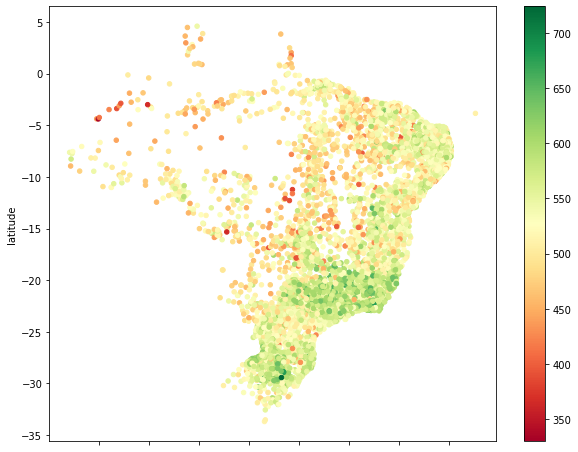

In [34]:
enem_idhm_municipios.plot\
.scatter(y='latitude', x='longitude',c = enem_idhm_municipios['NU_NOTA_REDACAO'],cmap = 'RdYlGn', figsize =(10, 8))

<AxesSubplot:title={'center':'NU_NOTA_REDACAO'}, xlabel='longitude', ylabel='latitude'>

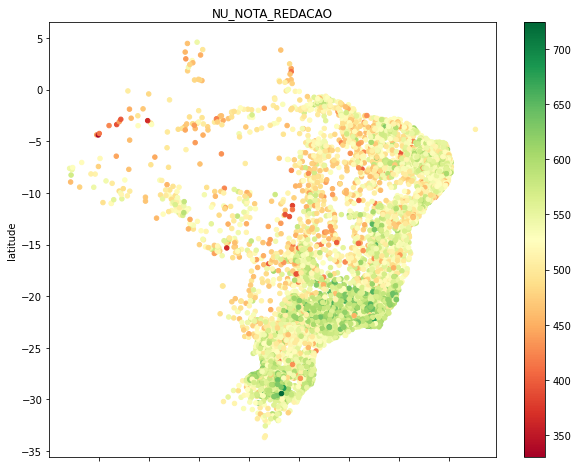

In [37]:
enem_idhm_municipios.plot\
.scatter(y='latitude', x='longitude',c = enem_idhm_municipios['NU_NOTA_REDACAO'],cmap = 'RdYlGn', figsize =(10, 8), title='NU_NOTA_REDACAO')

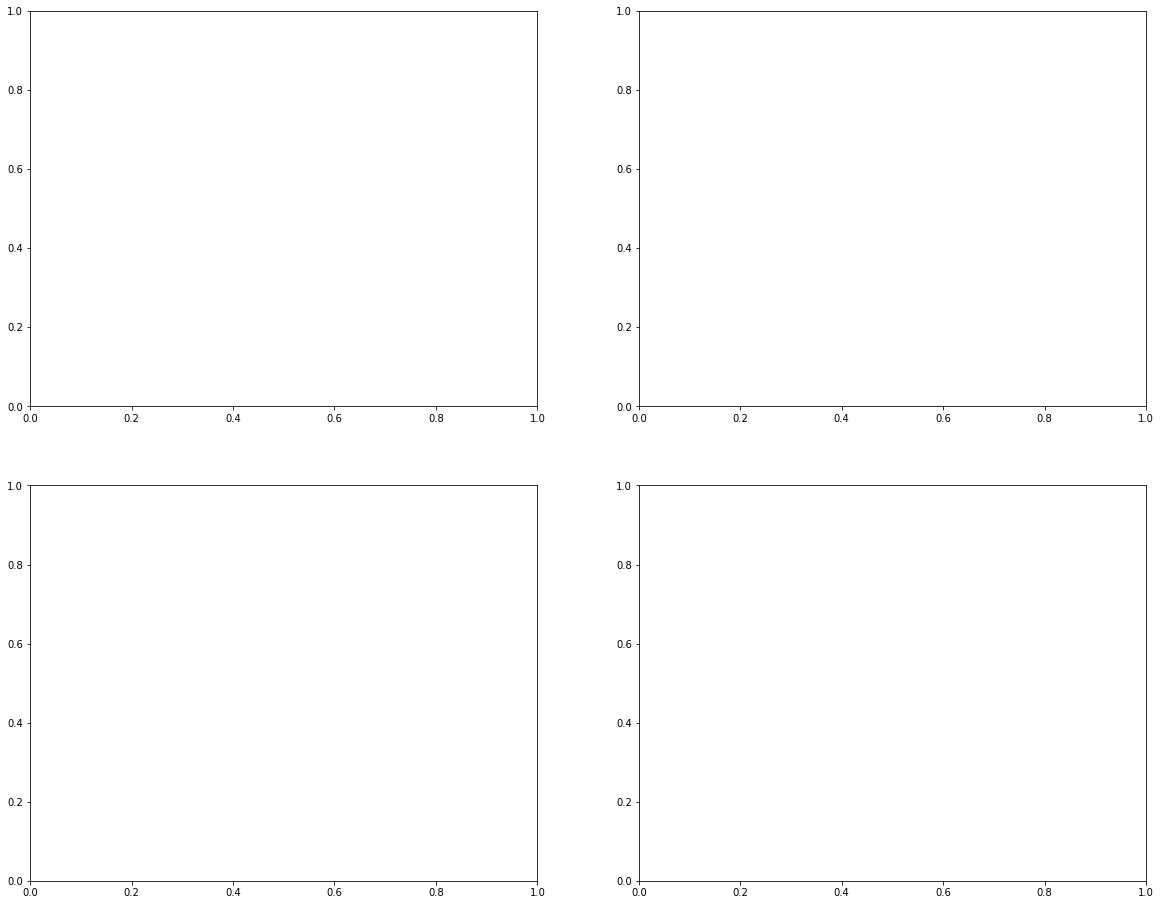

In [39]:
fig, ax = plt.subplots(2, 2, figsize =(20, 16))

<AxesSubplot:title={'center':'NU_NOTA_MT'}, xlabel='longitude', ylabel='latitude'>

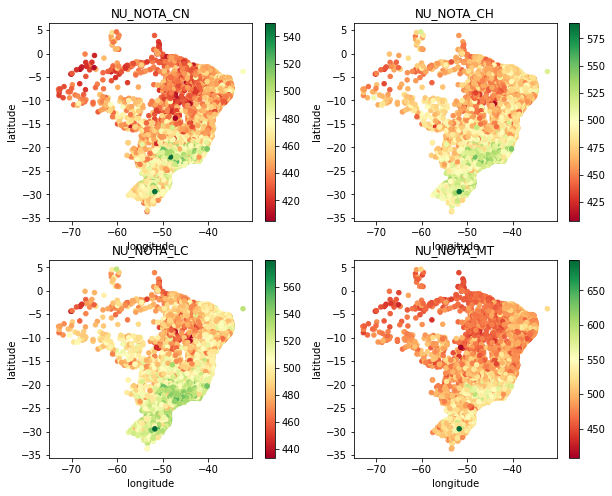

In [44]:
fig, ax = plt.subplots(2, 2, figsize =(20, 16))

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['NU_NOTA_CN'],\
         cmap = 'RdYlGn', figsize =(10, 8),\
         title='NU_NOTA_CN', ax= ax[0, 0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['NU_NOTA_CH'],\
         cmap = 'RdYlGn', figsize =(10, 8),\
         title='NU_NOTA_CH', ax= ax[0, 1])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['NU_NOTA_LC'],\
         cmap = 'RdYlGn', figsize =(10, 8),\
         title='NU_NOTA_LC', ax= ax[1, 0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['NU_NOTA_MT'],\
         cmap = 'RdYlGn', figsize =(10, 8),\
         title='NU_NOTA_MT', ax= ax[1, 1])

<AxesSubplot:title={'center':'NU_NOTA_MT'}, xlabel='longitude', ylabel='latitude'>

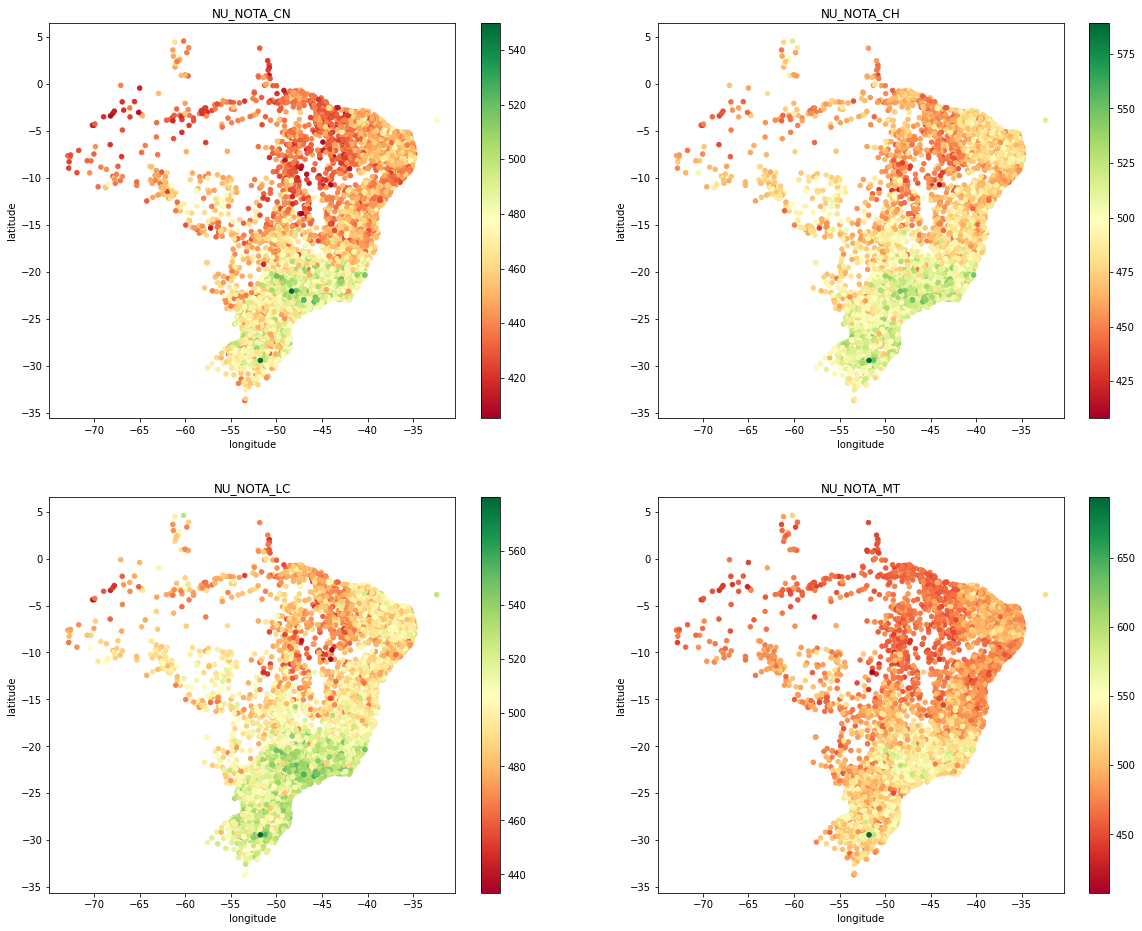

In [45]:
fig, ax = plt.subplots(2, 2, figsize =(20, 16))

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['NU_NOTA_CN'],\
         cmap = 'RdYlGn',\
         title='NU_NOTA_CN', ax= ax[0, 0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['NU_NOTA_CH'],\
         cmap = 'RdYlGn',\
         title='NU_NOTA_CH', ax= ax[0, 1])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['NU_NOTA_LC'],\
         cmap = 'RdYlGn',\
         title='NU_NOTA_LC', ax= ax[1, 0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['NU_NOTA_MT'],\
         cmap = 'RdYlGn',\
         title='NU_NOTA_MT', ax= ax[1, 1])

<AxesSubplot:title={'center':'IDHM_R'}, xlabel='longitude', ylabel='latitude'>

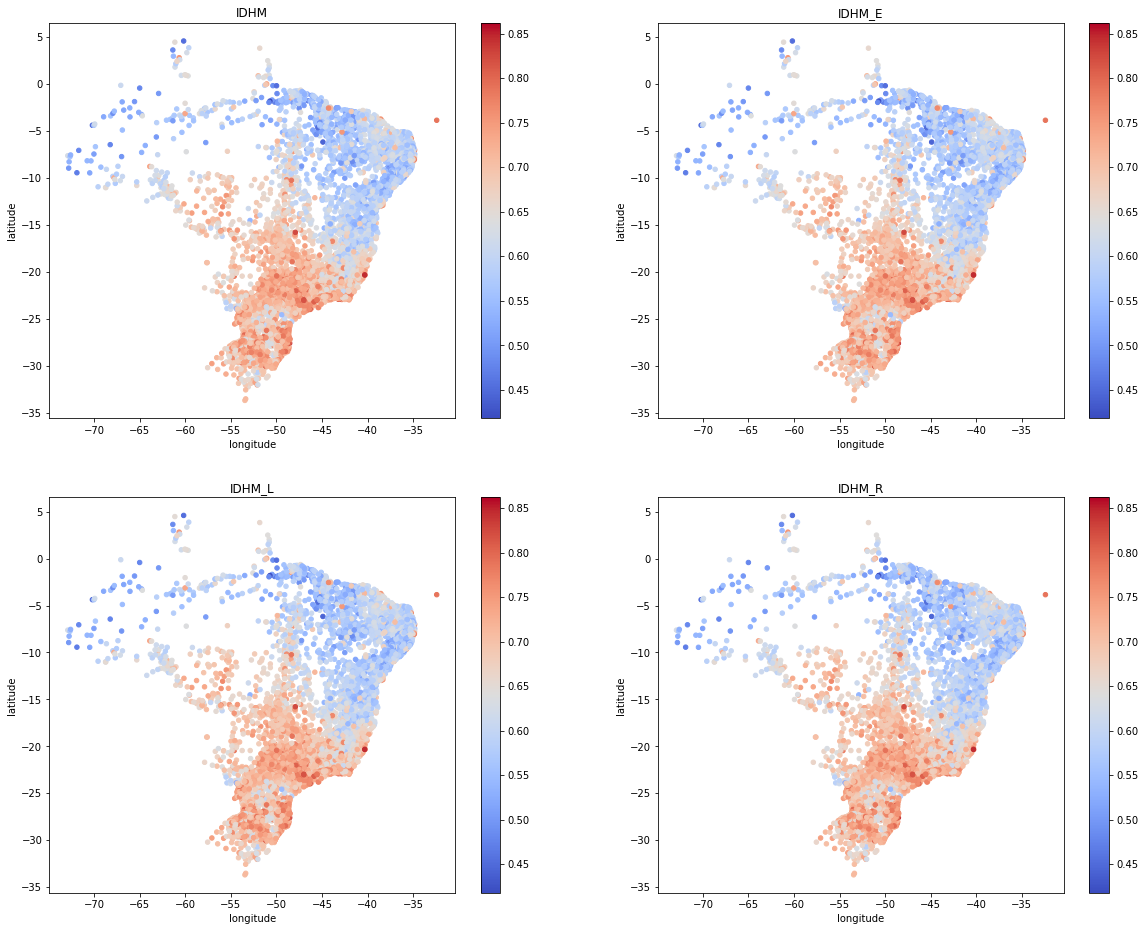

In [47]:
fig, ax = plt.subplots(2, 2, figsize =(20, 16))

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['IDHM'],\
         cmap = 'coolwarm',\
         title='IDHM', ax= ax[0, 0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['IDHM_E'],\
         cmap = 'coolwarm',\
         title='IDHM_E', ax= ax[0, 1])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['IDHM_L'],\
         cmap = 'coolwarm',\
         title='IDHM_L', ax= ax[1, 0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',\
         c = enem_idhm_municipios['IDHM_R'],\
         cmap = 'coolwarm',\
         title='IDHM_R', ax= ax[1, 1])